<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Supervised_Learning/Supervised%20Learning%20with%20Scikit-Learn/Time%20Series%20Analysis%20in%20Python/4%20Moving%20Average%20(MA)%20and%20ARMA%20Models/4_Moving_Average_(MA)_and_ARMA_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moving Average (MA) and ARMA Models

In this chapter you'll learn about another kind of model, the moving average, or MA, model. You will also see how to combine AR and MA models into a powerful ARMA model.

# Describe Model

1. Describe Model
In a Moving Average, or MA model,

2. Mathematical Description of MA(1) Model
today's value equals a mean plus noise, plus a fraction theta of yesterday's noise. Since there is only one lagged error on the right hand side, this is called an MA model of order 1, or simply an MA(1) model. If the MA parameter, theta, is zero, then the process is white noise. MA models are stationary for all values of theta.

3. Interpretation of MA(1) Parameter
Suppose R t is a time series of stock returns. If theta is negative, then a positive shock last period, represented by epsilon t-1, would have caused last period's return to be positive, but this period's return is more likely to be negative. A shock two periods ago would have no effect on today's return - only the shock now and last period. Also, note that the lag-1 autocorrelation turns out not to be theta, but theta over 1 plus theta squared.

4. Comparison of MA(1) Autocorrelation Functions
Here are four autocorrelation functions for different MA parameters. In each case, there is zero autocorrelation for an MA(1) beyond lag-1. When theta is positive, the lag-1 autocorrelation is positive and when theta is negative, the lag-1 autocorrelation is negative.

5. Example of MA(1) Process: Intraday Stock Returns
Higher frequency stock returns are a nice example of an MA(1) process. Here is an intraday plot for the stock price of Sprint Corporation for one day. The frequency of the data is one minute. Stocks trade at discrete one-cent increments rather than at continuous prices, and you can see that the stock can bounce back and forth over a one-cent range for long periods of time. This is sometimes referred to as the "bid/ask bounce".

6. Autocorrelation Function of Intraday Stock Returns
The bid/ask bounce induces a negative lag-1 autocorrelation, but no autocorrelation beyond lag-1. You can see this with the autocorrelation function plot of intraday returns. The lag-1 autocorrelation is significantly negative, and the other autocorrelations are not significantly different from zero.

7. Higher Order MA Models
So far, we've been only looking at MA(1) models. The model can be extended to include more lagged errors and more theta parameters. Here we show an MA(1), an MA(2), and an MA(3) model.

8. Simulating an MA Process
Just like in the last chapter with AR models, you may want to simulate a pure MA process. You can use the same statsmodels module, ArmaProcess. This time, for an MA(1), the AR order is just an array containing 1. The MA order is an array containing 1 and the MA(1) parameter theta. Unlike with the AR simulation, you don't need to reverse the sign of theta. As before, you create an instance of the class ArmaProcess. To simulate data, use the method generate_sample, with the number of simulated samples as an argument.

9. Let's practice!
Now let's try some examples.

# Simulate MA(1) Time Series

You will simulate and plot a few MA(1) time series, each with a different parameter, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3B8;</mi>
  </mstyle>
</math>, using the arima_process module in statsmodels, just as you did in the last chapter for AR(1) models. You will look at an MA(1) model with a large positive <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3B8;</mi>
  </mstyle>
</math> and a large negative <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3B8;</mi>
  </mstyle>
</math>.

As in the last chapter, when inputting the coefficients, you must include the zero-lag coefficient of 1, but unlike the last chapter on AR models, the sign of the MA coefficients is what we would expect. For example, for an MA(1) process with <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3B8;</mi>
    <mo>=</mo>
    <mo>&#x2212;</mo>
    <mn>0.9</mn>
  </mstyle>
</math>, the array representing the MA parameters would be ma = np.array([1, -0.9])

Instructions

1. Import the class ArmaProcess in the arima_process module.

2. Plot the simulated MA(1) processes
 
 - Let ma1 represent an array of the MA parameters [1, ] as explained above. The AR parameter array will contain just the lag-zero coefficient of one.
 
 - With parameters ar1 and ma1, create an instance of the class ArmaProcess(ar,ma) called MA_object1.

 - Simulate 1000 data points from the object you just created, MA_object1, using the method .generate_sample(). Plot the simulated data in a subplot.

3. Repeat for the other MA parameter.

Conclusion

The two MA parameters produce different time series plots, but in the next exercise you'll really be able to distinguish the time series.

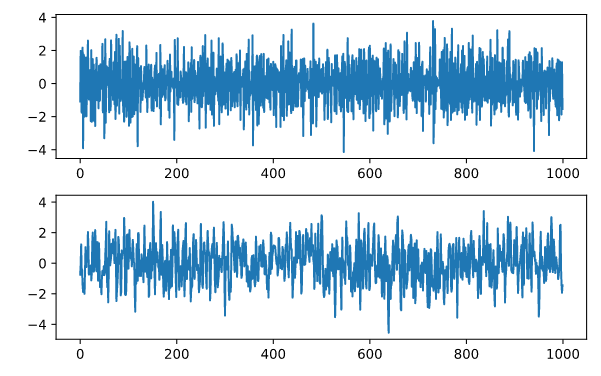


# Compute the ACF for Several MA Time Series

Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2, etc. The lag-1 autocorrelation for an MA(1) model is not <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3B8;</mi>
  </mstyle>
</math>, but rather <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3B8;</mi>
    <mrow>
      <mo>/</mo>
    </mrow>
    <mo stretchy="false">(</mo>
    <mn>1</mn>
    <mo>+</mo>
    <msup>
      <mi>&#x3B8;</mi>
      <mn>2</mn>
    </msup>
    <mo stretchy="false">)</mo>
  </mstyle>
</math>
. For example, if the MA parameter, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3B8;</mi>
  </mstyle>
</math>, is = +0.9, the first-lag autocorrelation will be <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mn>0.9</mn>
    <mrow>
      <mo>/</mo>
    </mrow>
    <mo stretchy="false">(</mo>
    <mn>1</mn>
    <mo>+</mo>
    <mo stretchy="false">(</mo>
    <mn>0.9</mn>
    <msup>
      <mo stretchy="false">)</mo>
      <mn>2</mn>
    </msup>
    <mo stretchy="false">)</mo>
    <mo>=</mo>
    <mn>0.497</mn>
  </mstyle>
</math>
, and the autocorrelation at all other lags will be zero. If the MA parameter, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3B8;</mi>
  </mstyle>
</math>, is -0.9, the first-lag autocorrelation will be <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mo>&#x2212;</mo>
    <mn>0.9</mn>
    <mrow>
      <mo>/</mo>
    </mrow>
    <mo stretchy="false">(</mo>
    <mn>1</mn>
    <mo>+</mo>
    <mo stretchy="false">(</mo>
    <mo>&#x2212;</mo>
    <mn>0.9</mn>
    <msup>
      <mo stretchy="false">)</mo>
      <mn>2</mn>
    </msup>
    <mo stretchy="false">)</mo>
    <mo>=</mo>
    <mo>&#x2212;</mo>
    <mn>0.497</mn>
  </mstyle>
</math>
.

You will verify these autocorrelation functions for the three time series you generated in the last exercise.

Instructions 

1. simulated_data_1 is the first simulated time series with an MA parameter of <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3B8;</mi>
    <mo>=</mo>
    <mo>&#x2212;</mo>
    <mn>0.9</mn>
  </mstyle>
</math>.

2. Compute the autocorrelation function of simulated_data_1 using the plot_acf function with 20 lags.

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()

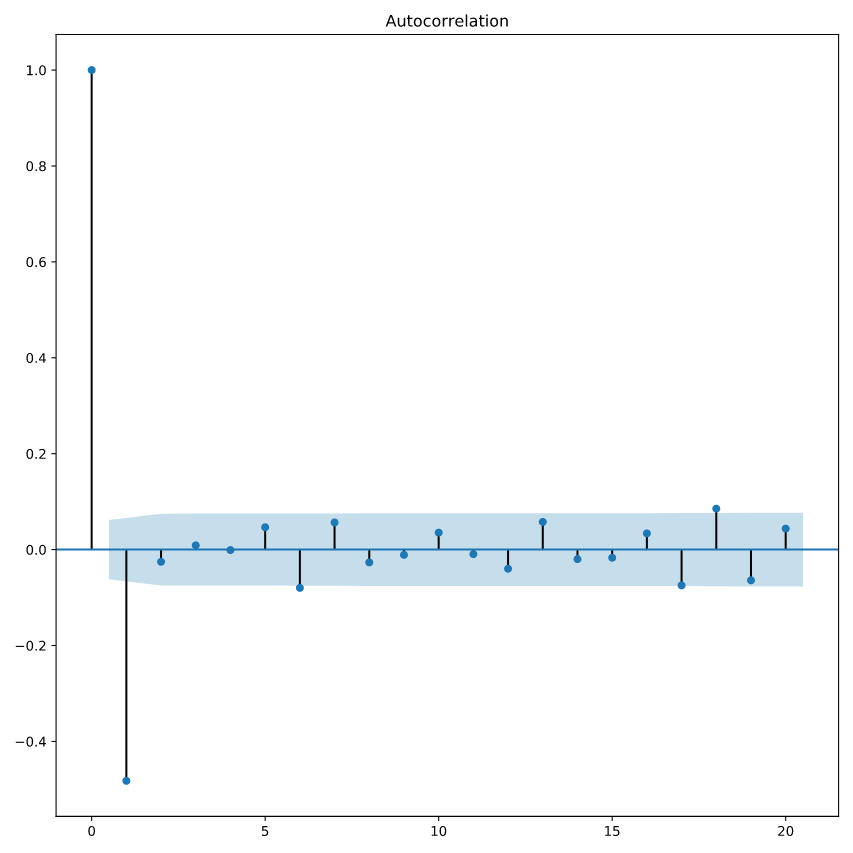

3. simulated_data_2 is the first simulated time series with an MA parameter of <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3B8;</mi>
    <mo>=</mo>
    <mn>0.9</mn>
  </mstyle>
</math>.

4. Compute the autocorrelation function of simulated_data_1 using the plot_acf function with 20 lags.



In [ ]:
# Plot 2: MA parameter = 0.9
plot_acf(simulated_data_2, lags=20)
plt.show()

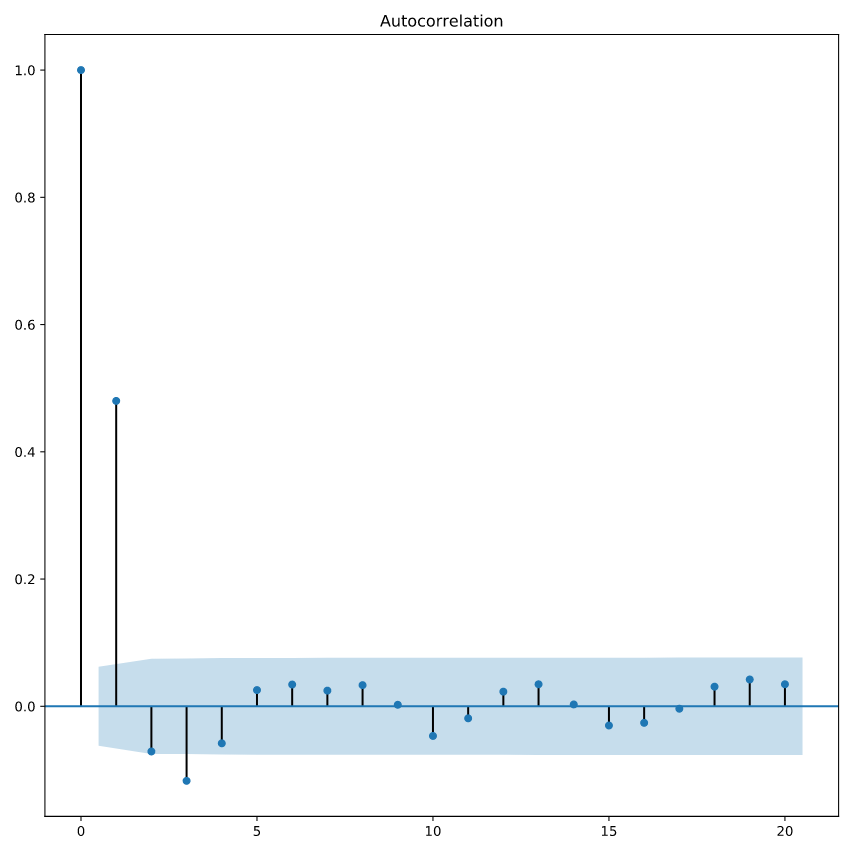

5. simulated_data_3 is the third simulated time series with an MA parameter of <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3B8;</mi>
    <mo>=</mo>
    <mo>&#x2212;</mo>
    <mn>0.3</mn>
  </mstyle>
</math>.

6. Compute the autocorrelation function using the plot_acf() function with 20 lags.

In [ ]:
# Plot 3: MA parameter = -0.3
plot_acf(simulated_data_3, lags=20)
plt.show()

Conclusion

Well Done! The ACF plots match what we predicted.

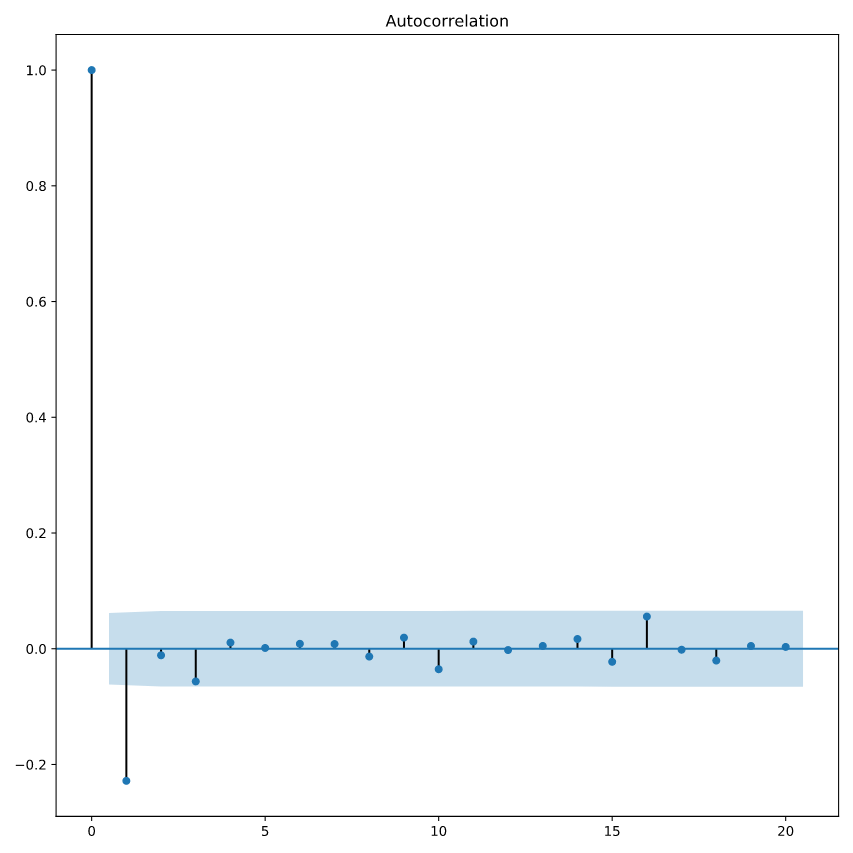

# Match ACF with MA Model

Here are four Autocorrelation plots:

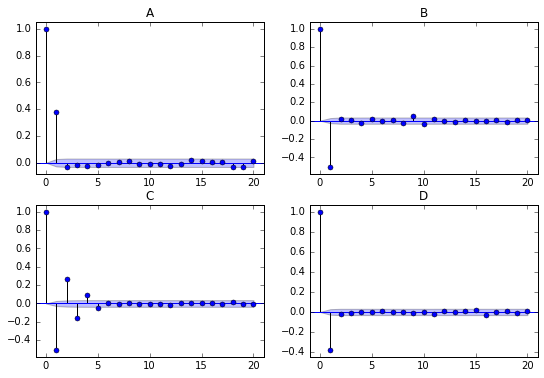

Which figure corresponds to an MA(1) model with an MA parameter of -0.5

1. A: Incorrect - This has a positive MA parameter

2. B: Incorrect - This has a lag 1 autocorrelation of -0.5, but the MA(1) has a lag 1 autocorrelation of -0.5/(1+(0.5)^2)

3. C: Incorrect - This is an AR(1) model, not MA(1), since the autocorrelation doesn't cut off at lag 1

4. D: Correct

# Estimation and Forecasting an MA Model

1. Estimation and Forecasting an MA Model
The same module that you used to estimate the parameters of

2. Estimating an MA Model
an AR model can be used to estimate the parameters of an MA model. Import the class ARMA as before, and create an instance of that class called mod, with the arguments being the data that you're trying to fit, and the order of the model. However, now the order is (0,1), for an MA(1), not (1,0) for an AR(1). And as before with an AR model, once you instantiate the class, you can use the method fit to estimate the model, and store the results in result.

3. Forecasting an MA Model
The procedure for forecasting an MA model is the same as that for an AR model: you again create an instance of the class using ARMA, and you use the fit method to *estimate* the parameters. Of course, to estimate an MA model, set the order to (0,1), then use the method plot_predict to do forecasting as you did for forecasting an AR model. One thing to note is that with an MA(1) model, unlike an AR model, all forecasts beyond the one-step ahead forecast will be the same.

4. Let's practice!
Time to put this into practice.

# Estimating an MA Model

You will estimate the MA(1) parameter, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3B8;</mi>
  </mstyle>
</math>, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For simulated_data_1 with a true <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3B8;</mi>
  </mstyle>
</math> of -0.9, you will print out the estimate of <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3B8;</mi>
  </mstyle>
</math>. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.

Instructions

1. Import the class ARMA in the module statsmodels.tsa.arima_model.

2. Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q) of the model (in this case, for an MA(1)), is order=(0,1).

3. Fit the model mod using the method .fit() and save it in a results object called res.

4. Print out the entire summary of results using the .summary() method.

5. Just print out an estimate of the constant and theta parameter using the .params attribute (no arguments).

In [ ]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

'''
<script.py> output:
                                  ARMA Model Results                              
    ==============================================================================
    Dep. Variable:                      y   No. Observations:                 1000
    Model:                     ARMA(0, 1)   Log Likelihood               -1420.500
    Method:                       css-mle   S.D. of innovations              1.001
    Date:                Wed, 10 Feb 2021   AIC                           2846.999
    Time:                        19:15:13   BIC                           2861.723
    Sample:                             0   HQIC                          2852.595
                                                                                  
    ==============================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
    ------------------------------------------------------------------------------
    const         -0.0038      0.003     -1.166      0.244      -0.010       0.003
    ma.L1.y       -0.8967      0.015    -59.984      0.000      -0.926      -0.867
                                        Roots                                    
    =============================================================================
                      Real          Imaginary           Modulus         Frequency
    -----------------------------------------------------------------------------
    MA.1            1.1152           +0.0000j            1.1152            0.0000
    -----------------------------------------------------------------------------
    When the true theta=-0.9, the estimate of theta (and the constant) are:
    [-0.00384352 -0.8967135 ]
'''

# Forecasting with MA Model

As you did with AR models, you will use MA models to forecast in-sample and out-of-sample data using statsmodels.

For the simulated series simulated_data_1 with <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3B8;</mi>
    <mo>=</mo>
    <mo>&#x2212;</mo>
    <mn>0.9</mn>
  </mstyle>
</math>, you will plot in-sample and out-of-sample forecasts. One big difference you will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is that the MA(1) forecasts more than one period in the future are simply the mean of the sample.

Instructions

1. Import the class ARMA in the module statsmodels.tsa.arima_model

2. Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the (p,q) order of the model (in this case, for an MA(1), order=(0,1)

3. Fit the model mod using the method .fit() and save it in a results object called res

4. Plot the in-sample and out-of-sample forecasts of the data using the .plot_predict() method

5. Start the forecast 10 data points before the end of the 1000 point series at 990, and end the forecast 10 data points after the end of the series at point 1010

In [ ]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

Conclusion

Notice that the out-of-sample forecasts are flat into the future after the first data point.

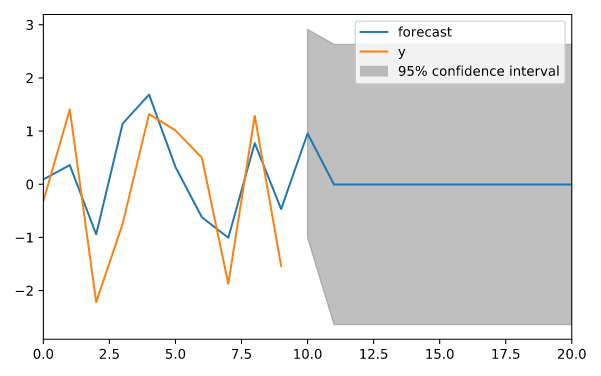

# ARMA models

1. ARMA models
An ARMA model is a combination of an AR and MA model.

2. ARMA Model
Here is the formula for an ARMA(1,1) model, which has the familiar AR(1) and MA(1) components.

3. Converting Between ARMA, AR, and MA Models
ARMA models can be converted to pure AR or pure MA models. Here is an example of converting an AR(1) model into and MA(infinity) model. The first line is an AR(1) model. Then, in the second line, the AR(1) equation is substituted for R t-1. You do the same for R t-2 in the third line, etc., and you eventually end up with an MA(infinity) model with coefficients phi, phi squared, phi cubed, etc.

4. Let's practice!
Now it's your turn.

# High Frequency Stock Prices

Higher frequency stock data is well modeled by an MA(1) process, so it's a nice application of the models in this chapter.

The DataFrame intraday contains one day's prices (on September 1, 2017) for Sprint stock (ticker symbol "S") sampled at a frequency of one minute. The stock market is open for 6.5 hours (390 minutes), from 9:30am to 4:00pm.

Before you can analyze the time series data, you will have to clean it up a little, which you will do in this and the next two exercises. When you look at the first few rows (see the IPython Shell), you'll notice several things. First, there are no column headers.The data is not time stamped from 9:30 to 4:00, but rather goes from 0 to 390. And you will notice that the first date is the odd-looking "a1504272600". The number after the "a" is Unix time which is the number of seconds since January 1, 1970. This is how this dataset separates each day of intraday data.

If you look at the data types, you'll notice that the DATE column is an object, which here means a string. You will need to change that to numeric before you can clean up some missing data.

The source of the minute data is Google Finance (see [here](https://www.quantshare.com/sa-426-6-ways-to-download-free-intraday-and-tick-data-for-the-us-stock-market) on how the data was downloaded).

The datetime module has already been imported for you.

Instructions

1. Manually change the first date to zero using .iloc[0,0].

2. Change the two column headers to 'DATE' and 'CLOSE' by setting intraday.columns equal to a list containing those two strings.

3. Use the pandas attribute .dtypes (no parentheses) to see what type of data are in each column.

4. Convert the 'DATE' column to numeric using the pandas function to_numeric().

5. Make the 'DATE' column the new index of intraday by using the pandas method .set_index(), which will take the string 'DATE' as its argument (not the entire column, just the name of the column).

In [ ]:
'''
             0      1
0  a1504272600  8.290
1            1  8.270
2            2  8.280
3            3  8.275
'''
'''
Conclusion

Good job getting the data in a format that we can work with.

<script.py> output:
    DATE      object
    CLOSE    float64
    dtype: object

       CLOSE
DATE        
0     8.2900
1     8.2700
2     8.2800
3     8.2750
4     8.2875
'''

# More Data Cleaning: Missing Data

When you print out the length of the DataFrame intraday, you will notice that a few rows are missing. There will be missing data if there are no trades in a particular one-minute interval. One way to see which rows are missing is to take the difference of two sets: the full set of every minute and the set of the DataFrame index which contains missing rows. After filling in the missing rows, you can convert the index to time of day and then plot the data.

Stocks trade at discrete one-cent increments (although a small percentage of trades occur in between the one-cent increments) rather than at continuous prices, and when you plot the data you should observe that there are long periods when the stock bounces back and forth over a one cent range. This is sometimes referred to as "bid/ask bounce".

Instructions

1. Print out the length of intraday using len().

In [ ]:
# Notice that some rows are missing
print("If there were no missing rows, there would be 391 rows of minute data")
print("The actual length of the DataFrame is:", len(intraday))

'''
<script.py> output:
    If there were no missing rows, there would be 391 rows of minute data
    The actual length of the DataFrame is: 389
'''

2. Find the missing rows by making range(391) into a set and then subtracting the set of the intraday index, intraday.index.

In [ ]:
# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything - set_intraday

# Print the difference
print("Missing rows: ", set_missing)

'''
<script.py> output:
    Missing rows:  {182, 14}
'''

3. Fill in the missing rows using the .reindex() method, setting the index equal to the full range(391) and forward filling the missing data by setting the method argument to 'ffill'.

In [ ]:
# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

4. Change the index to times using pandas function date_range(), starting with '2017-09-01 9:30' and ending with '2017-09-01 16:00' and passing the argument freq='1min'.

5. Plot the data and include gridlines.

In [ ]:
# From previous step
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

Conclusion

Missing data is common with high frequency financial time series, so good job fixing that.

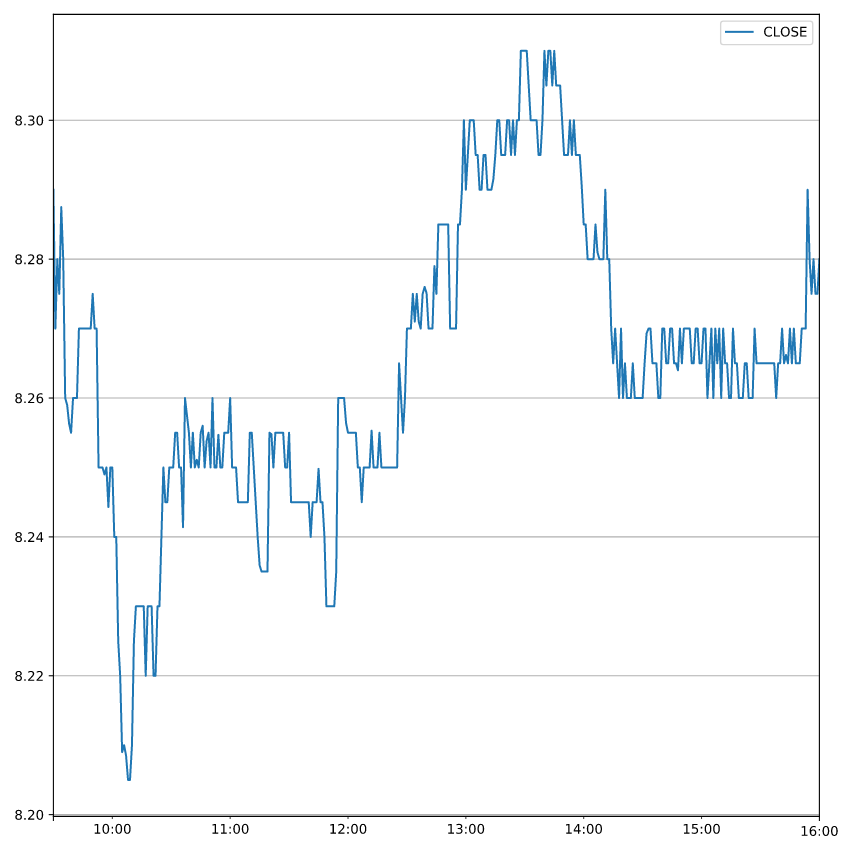

# Applying an MA Model

The bouncing of the stock price between bid and ask induces a negative first order autocorrelation, but no autocorrelations at lags higher than 1. You get the same ACF pattern with an MA(1) model. Therefore, you will fit an MA(1) model to the intraday stock data from the last exercise.

The first step is to compute minute-by-minute returns from the prices in intraday, and plot the autocorrelation function. You should observe that the ACF looks like that for an MA(1) process. Then, fit the data to an MA(1), the same way you did for simulated data.

Instructions

1. Import plot_acf and ARMA modules from statsmodels

2. Compute minute-to-minute returns from prices:

 - Compute returns with the .pct_change() method

 - Use the pandas method .dropna() to drop the first row of returns, which is NaN

3. Plot the ACF function with lags up to 60 minutes

4. Fit the returns data to an MA(1) model and print out the MA(1) parameter

In [ ]:
# Import plot_acf and ARMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

'''
Conclusion

Notice the significant negative lag-1 autocorrelation, just like for an MA(1) model.

<script.py> output:
    const         -0.000002
    ma.L1.CLOSE   -0.179272
    dtype: float64
'''

Conclusion

Notice the significant negative lag-1 autocorrelation, just like for an MA(1) model.

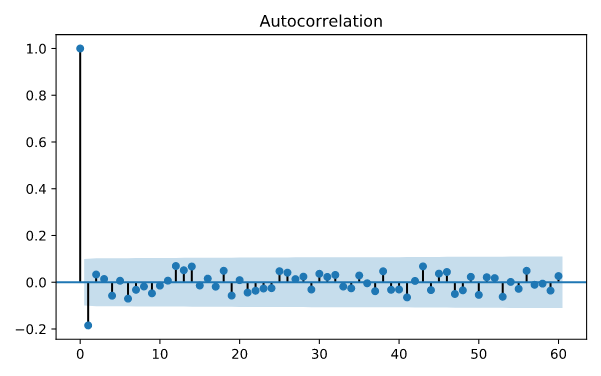

# Equivalence of AR(1) and MA(infinity)

To better understand the relationship between MA models and AR models, you will demonstrate that an AR(1) model is equivalent to an MA(<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi mathvariant="normal">&#x221E;</mi>
  </mstyle>
</math>) model with the appropriate parameters.

You will simulate an MA model with parameters <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mn>0.8</mn>
    <mo>,</mo>
    <msup>
      <mn>0.8</mn>
      <mn>2</mn>
    </msup>
    <mo>,</mo>
    <msup>
      <mn>0.8</mn>
      <mn>3</mn>
    </msup>
    <mo>,</mo>
    <mo>&#x2026;</mo>
  </mstyle>
</math>
 for a large number (30) lags and show that it has the same Autocorrelation Function as an AR(1) model with <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3D5;</mi>
    <mo>=</mo>
    <mn>0.8</mn>
  </mstyle>
</math> .

Note, to raise a number x to the power of an exponent n, use the format x**n.

Instructions

1. Import the modules for simulating data and plotting the ACF from statsmodels

2. Use a list comprehension to build a list with exponentially decaying MA parameters: <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mn>1</mn>
    <mo>,</mo>
    <mn>0.8</mn>
    <mo>,</mo>
    <msup>
      <mn>0.8</mn>
      <mn>2</mn>
    </msup>
    <mo>,</mo>
    <msup>
      <mn>0.8</mn>
      <mn>3</mn>
    </msup>
    <mo>,</mo>
    <mo>&#x2026;</mo>
  </mstyle>
</math>

3. Simulate 5000 observations of the MA(30) model

4. Plot the ACF of the simulated series

In [ ]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

Conclusion

Notice that the ACF looks the same as an AR(1) with parameter 0.8

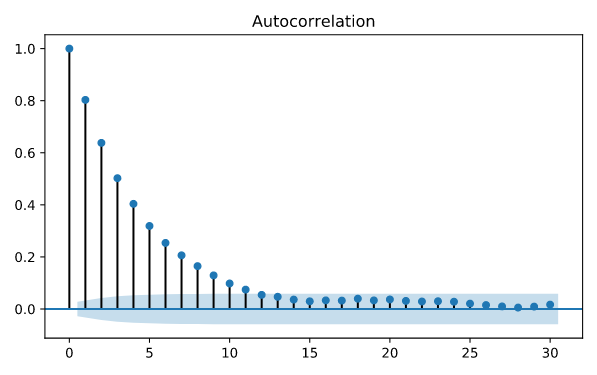